## Quick demo on how to take use Spectral-Utilities

* Tracking down a hyperspectral file in sea of files
* Load a hsi
* Display a single band
* Display an rgb composite 
* Display GNRMC Decimal Degree style coordinates converted to WGS84 Lat/Long

### Navigating the file system 

When applying the same operations to a large filesystem loops can become densely cluttered with logic to avoid some files. This is an attempt to avoid repeating past work, or having to use hard-coded absolute file paths
Given a parent directory containing many HSI in the form of:

HSI_parent_Folder<br>
|<br>
|___HSI_img_folder1<br>
|<br>
|___HSI_img_folder ...<br>
|<br>
|___HSI_img_folderN<br>

Each HSI_img_folder contains subdirectories for each exposure, then an additional folder containing thumbnails of each image for each band captured along with a HDR and DAT file <br>

In [1]:
# Bring in the HDR utility module: "HDRprocess" and data viewing module: "HSI_Model" 
import matplotlib.pyplot as plt # for display purposes
import sys
sys.path.append("..")
import HDRprocess
import HSI_Model
hsiParentFolder = "Z:\\Data\\Berries_FresnoState\\Berry_Images"
# Berry images were taken at 200ms and 1000ms exposures

In [2]:
#
## Grab the absolute path of all HSI folders within your project directory
#
allHSIFolders = HDRprocess.get_folder_list_from_root_dir(hsiParentFolder) # contains optional parameter "filter_out" which is useful when extra files exist in this folder
print(f"Collected {len(allHSIFolders)} from the root directory: {hsiParentFolder}")
#
## Grab the camera-given names of these hsi folders, without the full path
#
hsiNames = HDRprocess.get_hsi_folder_names(hsiParentFolder)
# 
## Get the header file associated for a single HSI folder with a particular exposure
# 
hdrFilePath = HDRprocess.get_absolute_path_HDR_from_parent_path_and_exposure(path_parent=allHSIFolders[0],exposure="200ms")
print(f"Retrieved header file labeled: {hsiNames[0]} with path: {hdrFilePath}")

Collected 396 from the root directory: Z:\Data\Berries_FresnoState\Berry_Images
Retrieved header file labeled: leaf_2020_cabinet_210927_123951 with path: Z:\Data\Berries_FresnoState\Berry_Images\leaf_2020_cabinet_210927_123951\leaf_2020_200ms_80wl\leaf_2020_200ms_80wl_000000\leaf_2020_200ms_80wl_000000.hdr


### Load an HSI into your workspace
The binary file with extension DAT is assumed to be within the same directory as its HDR file to perform image operations or examine the data. Actual load times of an image depend on how many bands were captured at acquisition, network connection, etc.<br>
Using the HSI_Model module take advantage of the previously loaded file path to begin any preprocessing.<br><br>
There is a few parameters that can be specified upon initialization, such as data set, segmentation mask, and normalization<br>
While some are straight forward such parameters as:<br><br>
"path_mask" - If previous segmentation work has been done, you can load it as part of this object instance<br><br>
"dataset" - With work being done on two known data sets so far ["tripod","berry"] are valid options thus far. This corresponds to what bands will be used to create an rgb composite<br><br>
"norm_max" - With rgb composites being useful to examine certain data or create ML model input, designate what the maximum integer value should be. The most common option should be 255, if unspecified pixel values will be floats [0-1]<br><br>

In [3]:
hsi = HSI_Model.HSI_Model(path_hcube=hdrFilePath,imgName=hsiNames[0],dataset="berry",norm_max=255)

loading hypercube...
constructing composite image using wavelengths:510.1nm, 550.6nm, 651.9nm 
HSI load complete...


In [4]:
#
## Display collected wavelengths and time of acquisition  (useful for loops and logic involving calibration std's)
#
print(f"The image: {hsi.imageName}  was captured at time: {hsi.timeTaken},\ncontains data on wavelengths: \n{hsi.wv}")

The image: leaf_2020_cabinet_210927_123951  was captured at time: 2021-09-27 12:39:51,
contains data on wavelengths: 
[500.0, 505.1, 510.1, 515.2, 520.3, 525.3, 530.4, 535.4, 540.5, 545.6, 550.6, 555.7, 560.8, 565.8, 570.9, 575.9, 581.0, 586.1, 591.1, 596.2, 601.3, 606.3, 611.4, 616.5, 621.5, 626.6, 631.6, 636.7, 641.8, 646.8, 651.9, 657.0, 662.0, 667.1, 672.2, 677.2, 682.3, 687.3, 692.4, 697.5, 702.5, 707.6, 712.7, 717.7, 722.8, 727.8, 732.9, 738.0, 743.0, 748.1, 753.2, 758.2, 763.3, 768.4, 773.4, 778.5, 783.5, 788.6, 793.7, 798.7, 803.8, 808.9, 813.9, 819.0, 824.1, 829.1, 834.2, 839.2, 844.3, 849.4, 854.4, 859.5, 864.6, 869.6, 874.7, 879.7, 884.8, 889.9, 894.9, 900.0]


### Display a single band
All the data acquired from each band is loaded into a "hypercube" or rather 3d array, accessible by the hcube property<br>
The indices will be in the form of hcube[row,column,band] where row and column correspond to spatial extent

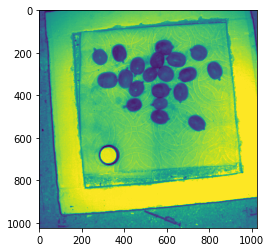

In [5]:
#
## False color
#
plt.imshow(hsi.hcube[:,:,20])

### Display RGB composite
Through the designation of initialization parameters, a 3-band color image is an accessible property to display with pixel values [1-255]

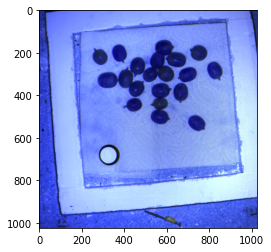

In [6]:
#
## Arbitrary rgb's (some older workflows depend on this, sorry)
#
plt.imshow(hsi.rgb)

When an rgb is not of a suitable quality, this can be modified by manually selecting wavelengths...

Reset RGB by using wavelengths: r-535.4 , g-575.9, b-601.3


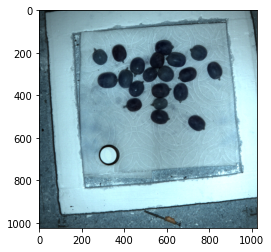

In [7]:
#
## Closer to real rgb
#
print(f"Reset RGB by using wavelengths: r-{hsi.wv[7]} , g-{hsi.wv[15]}, b-{hsi.wv[20]}")
hsi.set_rgb_by_wv_index(7,15,20,norm_max = 255)
plt.imshow(hsi.rgb)

### GPS

#### Demo coming soon!